In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

train = 'train.csv'
test = 'test.csv'

pet_data = pd.read_csv(train)
X = pet_data.drop(columns=['Id','Subject Focus','Pawpularity'])
y = pet_data['Pawpularity']

# Visualizing

In [3]:
pet_data

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9907,ffbfa0383c34dc513c95560d6e1fdb57,0,0,0,1,0,0,0,0,0,0,0,1,15
9908,ffcc8532d76436fc79e50eb2e5238e45,0,1,1,1,0,0,0,0,0,0,0,0,70
9909,ffdf2e8673a1da6fb80342fa3b119a20,0,1,1,1,0,0,0,0,1,1,0,0,20
9910,fff19e2ce11718548fa1c5d039a5192a,0,1,1,1,0,0,0,0,1,0,0,0,20


(array([  4.,  77.,  90.,  36.,  34.,  24.,  29.,  36.,  39.,  36.,  50.,
         69.,  80.,  62.,  82.,  80., 116., 156., 145., 172., 190., 242.,
        249., 255., 285., 316., 302., 318., 304., 318., 312., 291., 239.,
        247., 247., 229., 225., 179., 179., 192., 181., 184., 159., 123.,
        133., 123., 117., 134., 103., 106.,  82.,  77.,  89.,  71.,  88.,
         62.,  64.,  67.,  61.,  64.,  40.,  57.,  66.,  51.,  49.,  47.,
         36.,  31.,  31.,  34.,  46.,  31.,  34.,  26.,  30.,  26.,  29.,
         22.,  24.,  17.,  27.,  14.,  24.,  18.,  16.,  14.,  19.,  21.,
         13.,   7.,  15.,  14.,  13.,  13.,  11.,  12.,   8.,  10.,   4.,
        288.]),
 array([  1.  ,   1.99,   2.98,   3.97,   4.96,   5.95,   6.94,   7.93,
          8.92,   9.91,  10.9 ,  11.89,  12.88,  13.87,  14.86,  15.85,
         16.84,  17.83,  18.82,  19.81,  20.8 ,  21.79,  22.78,  23.77,
         24.76,  25.75,  26.74,  27.73,  28.72,  29.71,  30.7 ,  31.69,
         32.68,  33.67,  34.66

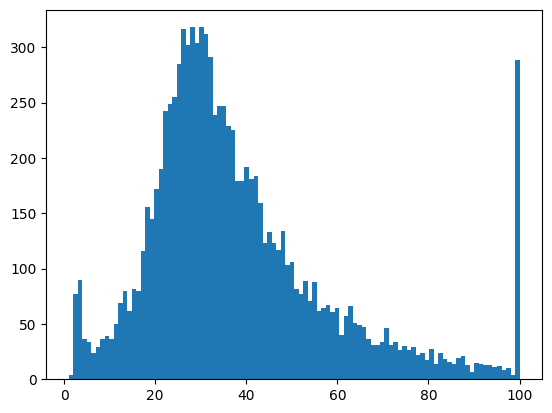

In [4]:
plt.hist(pet_data['Pawpularity'],bins=100)

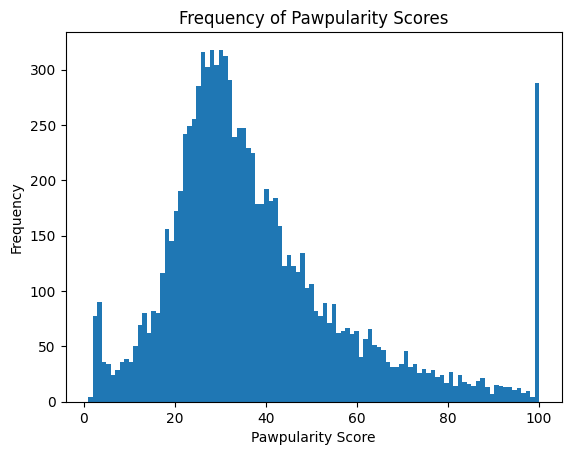

count    9912.000000
mean       38.039044
std        20.591990
min         1.000000
25%        25.000000
50%        33.000000
75%        46.000000
max       100.000000
Name: Pawpularity, dtype: float64

In [20]:
import matplotlib.pyplot as plt

plt.hist(pet_data['Pawpularity'], bins=100)
plt.title('Frequency of Pawpularity Scores')
plt.xlabel('Pawpularity Score')
plt.ylabel('Frequency')
plt.show()

pet_data['Pawpularity'].describe()

In [5]:
def compare_pawpularity(feature_name="Eyes"):
    _=plt.hist(pet_data["Pawpularity"][pet_data[feature_name]==1],bins=50,density=1.,label=feature_name+"==1",alpha=0.5)
    _=plt.hist(pet_data["Pawpularity"][pet_data[feature_name]!=1],bins=50,density=1.,label=feature_name+"!=1",alpha=0.5)
    
    _=plt.legend()
    plt.show()

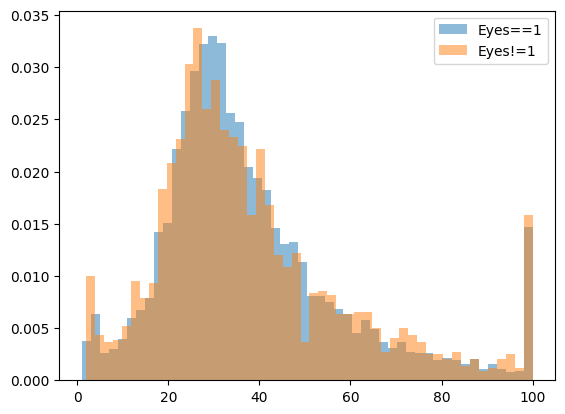

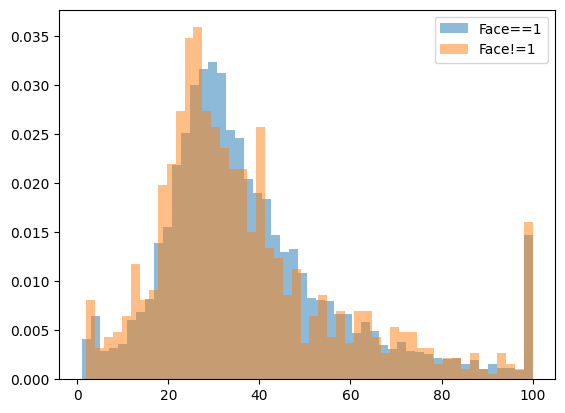

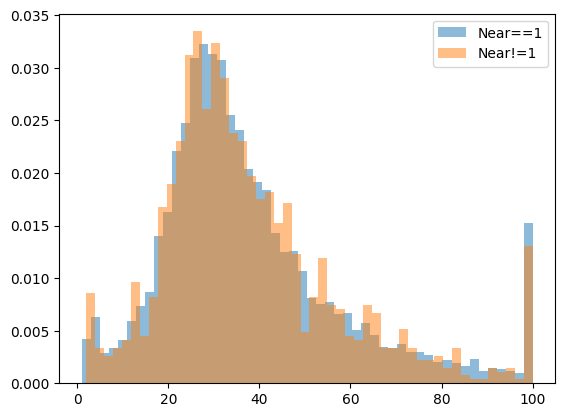

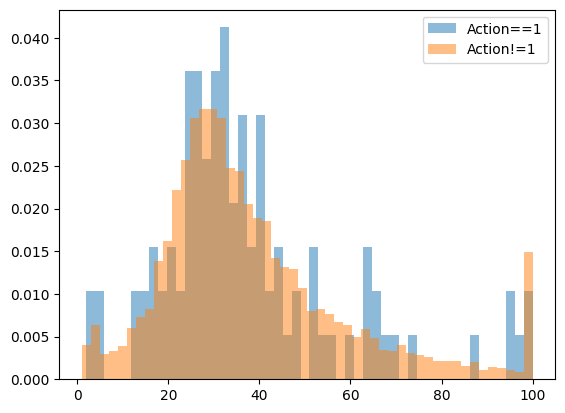

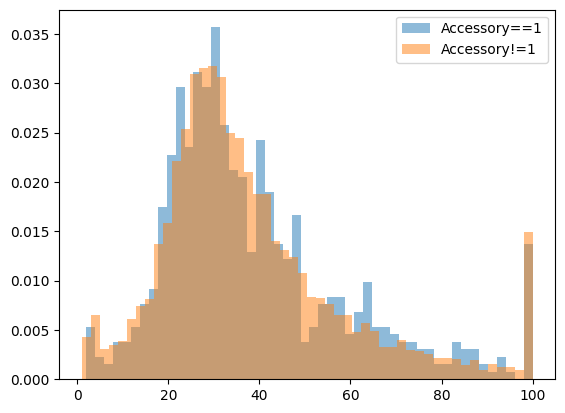

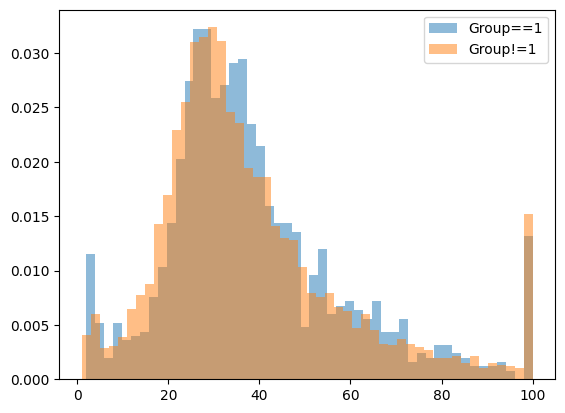

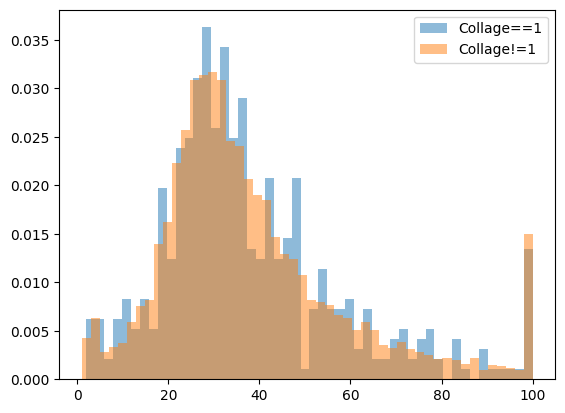

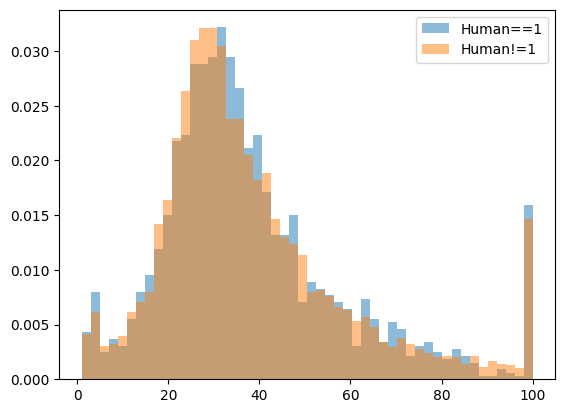

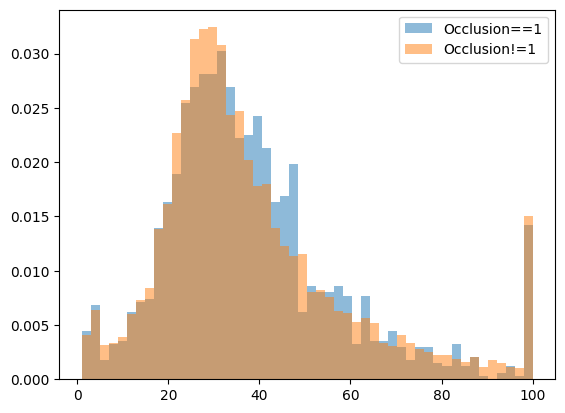

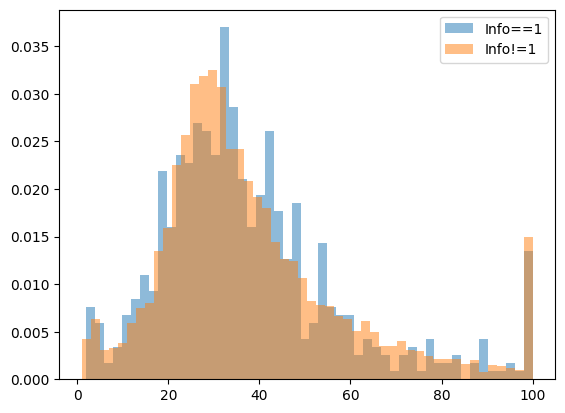

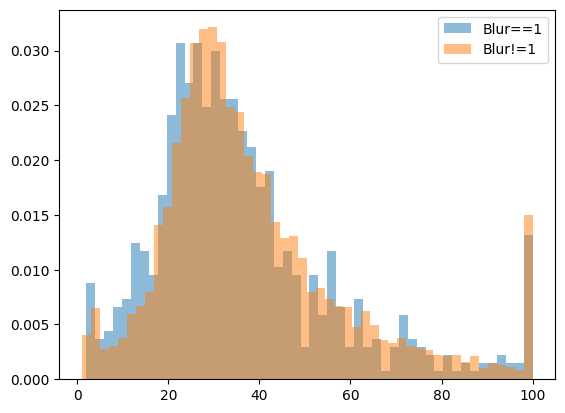

[None, None, None, None, None, None, None, None, None, None, None]

In [6]:
list(map(compare_pawpularity,pet_data.columns[2:-1]))

# Training

In [7]:
model = DecisionTreeClassifier() # Our model
model.fit(X.values,y) # Takes in our X and Y

predictions = model.predict([ [0]*11, [1]*11 ])
predictions

array([30, 15])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X.values,y,test_size=0.2)

model.fit(X_train,y_train)
predictions = model.predict(X_test)

# Accuracy

In [9]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test,predictions)
score

0.022188603126575897

In [10]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, predictions))
rmse

28.10984505124212

In [11]:
def RMSE(true,predicted):
    RMSE = mean_squared_error(true,predicted, squared=False)
    return RMSE

print('RMSE :', RMSE(y_test,predictions))

RMSE : 28.10984505124212


# Visualization

In [14]:
X_test.shape

(1983, 11)

In [15]:
X_train.shape

(7929, 11)

In [16]:
7929+1983

9912